In [3]:
import sklearn.feature_extraction
import pandas as pd
import string

df = pd.read_csv('phishing_data.csv', encoding = "ISO-8859-1")
df.describe()

,Email body,Label
count,426,426
unique,330,2
top,The number strings in the below attachments ex...,Benign E-mail
freq,4,216


In [4]:
df_emails = pd.read_csv('emails.csv', nrows=5000)
df_emails = df_emails.drop('file', axis=1)
df_emails = df_emails.rename(columns={'message':'Email body'})
df_emails['Label'] = 'Benign E-mail'
df_emails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
Email body    5000 non-null object
Label         5000 non-null object
dtypes: object(2)
memory usage: 78.2+ KB


In [5]:
df = pd.concat([df, df_emails])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5426 entries, 0 to 4999
Data columns (total 2 columns):
Email body    5426 non-null object
Label         5426 non-null object
dtypes: object(2)
memory usage: 127.2+ KB


In [6]:
from sklearn.utils import shuffle
df['length'] = df['Email body'].apply(len)
df = df[df.length < 8000]
df = shuffle(df)
df.head()

,Email body,Label,length
3274,Message-ID: <30793972.1075857600929.JavaMail.e...,Benign E-mail,805
906,Message-ID: <1122330.1075855694357.JavaMail.ev...,Benign E-mail,562
3040,Message-ID: <13497485.1075857596435.JavaMail.e...,Benign E-mail,883
2051,Message-ID: <6722149.1075862165935.JavaMail.ev...,Benign E-mail,4153
1715,Message-ID: <17337645.1075855677860.JavaMail.e...,Benign E-mail,1071


## Part 2: Basic Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas!

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10d061090>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10d0bc150>], dtype=object)

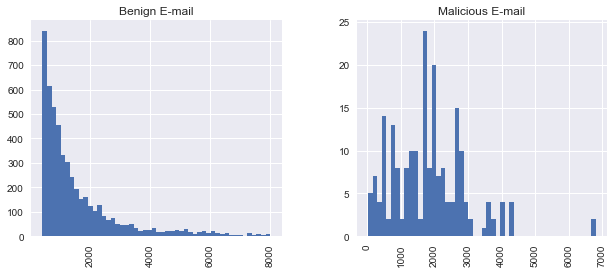

In [8]:
df.hist(column='length', by='Label', bins=50,figsize=(10,4))

## Part 3: Text pre-processing

Our main issue with our data is that it is all in text format (strings). The classification algorithms that we've learned about so far will need some sort of numerical feature vector in order to perform the classification task. There are actually many methods to convert a corpus to a vector format. The simplest is the the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.

We'll begin by 

In this section we'll massage the raw messages (sequence of characters) into vectors (sequences of numbers).

As a first step, let's write a function that will split a message into its individual words and return a list. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the [NLTK]() library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [9]:
from nltk.corpus import stopwords
from nltk.corpus import words
stopwords.words('english')[0:10] # Show some stop words

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [10]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation and not char.isdigit() and char != '\\xc']
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [11]:
df['Email body'].apply(text_process).head(5)

3274    [MessageID, JavaMailevansthyme, Date, Mon, Jul...
906     [MessageID, JavaMailevansthyme, Date, Mon, Apr...
3040    [MessageID, JavaMailevansthyme, Date, Tue, Oct...
2051    [MessageID, JavaMailevansthyme, Date, Tue, Nov...
1715    [MessageID, JavaMailevansthyme, Date, Wed, Dec...
Name: Email body, dtype: object

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Email body'])

# Print total number of vocab words
print len(bow_transformer.vocabulary_)

36578


In [13]:
', '.join(bow_transformer.get_feature_names()[200:300])

u'AIRCRAFT, AIRLINES, AIRPORT, AITP, AIpdf, ALERT, ALERTPhillip, ALIBOUNDARYcbdd, ALIBOUNDARYcbde, ALIGNDLEFT, ALLEN, ALLENPHILLIP, ALLINONE, ALLO, ALLOCATE, ALLYSON, ALS, ALSO, ALT, ALTs, ALWAYS, ALnNJGNKqYdkTPIvbqC, ALoCoQmJWditbgLusEvpoCoMAMHwpdQIHXjmHOetuteEYiZhTWinSerHwdxcbLOXIHOImqUvTbqScyPCcCyfFKSehrotLkyKXzuoZgdCEzrJRhJlgXaspwQKzIlEIzOmrdEBZDvdsozMfGqcY, AMC, AMD, AMERICA, AMERICAN, AMEX, AMF, AMFs, AMGN, AMHP, AMHPLeanderDOC, AMHPs, AMR, AMRO, AMT, AMZN, AMbr, ANALYSIS, ANCHORDESK, ANDOR, ANNOUNCING, ANSWERED, ANTITERRORIST, ANTONIO, ANWR, ANYTHING, ANYWAY, AOL, AOmetfNLiHXXhYYggVrBCQqCxwoGQxAncgInatpBnqZFkDuPdxPpPT, APB, APEA, API, APIrot, APIs, APOLOGIES, APOLOGY, APPEAL, APPLE, APPLES, APPLICATION, APPLIED, APPLY, APPROACH, APPROPRIATE, APPROVAL, APPROVE, APPROVED, APPS, APR, APRMAR, APT, APoZziHnyWrCDU, APs, AQMFWrsIbxHXVWqRqwGSxCAg, AR, ARDMORE, ARENA, ARNOLD, ARNOLDJ, ARNOLDJOHN, AROUSED, ARP, ARRIVE, ARSAVIAGRAbr, ARSAWITHOUTbr, ARSAfont, ARSystem, ARSystemectenroncom, 

In [14]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
 
ps = PorterStemmer()
feature_words = bow_transformer.get_feature_names()
feature_names = set()
for word in feature_words:
    feature_names.add(ps.stem(word))
len(feature_names)

30432

In [15]:
messages_bow = bow_transformer.transform(df['Email body'])
print 'Shape of Sparse Matrix: ', messages_bow.shape
print 'Amount of Non-Zero occurences: ', messages_bow.nnz
print 'sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

Shape of Sparse Matrix:  (5297, 36578)
Amount of Non-Zero occurences:  505837
sparsity: 0.26%


In [16]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf=True,).fit(messages_bow)

In [17]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print messages_tfidf.shape

(5297, 36578)


In [18]:
from sklearn.naive_bayes import MultinomialNB

threat_detect_model = MultinomialNB().fit(messages_tfidf, df['Label'])

In [19]:
all_predictions = threat_detect_model.predict(messages_tfidf)

In [20]:
from sklearn.metrics import classification_report
print classification_report(df['Label'], all_predictions)

                  precision    recall  f1-score   support

   Benign E-mail       0.99      1.00      1.00      5089
Malicious E-mail       1.00      0.83      0.91       208

     avg / total       0.99      0.99      0.99      5297



## Part 7: Creating a Data Pipeline

Let's run our model again and then predict off the test set. We will use SciKit Learn's [pipeline](http://scikit-learn.org/stable/modules/pipeline.html) capabilities to store a pipline of workflow. This will allow us to set up all the transformations that we will do to the data for future use. Let's see an example of how it works:

In [21]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [22]:
from sklearn.cross_validation import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(df['Email body'], df['Label'], test_size=0.5)

print len(msg_train), len(msg_test), len(msg_train) + len(msg_test)

2648 2649 5297


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x112e62578>, binary=False,
        decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=Non...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [24]:
predictions = pipeline.predict(msg_test)

In [25]:
print classification_report(predictions,label_test)

                  precision    recall  f1-score   support

   Benign E-mail       1.00      0.98      0.99      2588
Malicious E-mail       0.59      1.00      0.74        61

     avg / total       0.99      0.98      0.99      2649



5it [00:39,  8.09s/it]


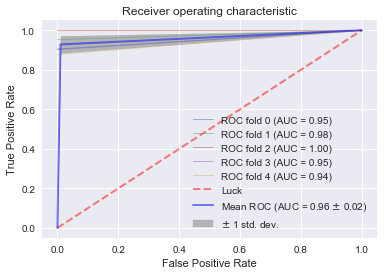

In [27]:
from scipy import interp
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm
import numpy as np

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
df = df.reset_index()
messages_tfidf_dense = messages_tfidf.toarray()
df.Label = df.Label.eq('Malicious E-mail').mul(1)

i = 0
for train, test in tqdm(cv.split(messages_tfidf_dense, df['Label'])):
    probas_ = classifier.fit(messages_tfidf_dense[train], df.Label[train]).predict_proba(messages_tfidf_dense[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(df.Label[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.5,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.5)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.5)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0) 
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.5,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[2546   42]
 [   0   61]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.    1.  ]]


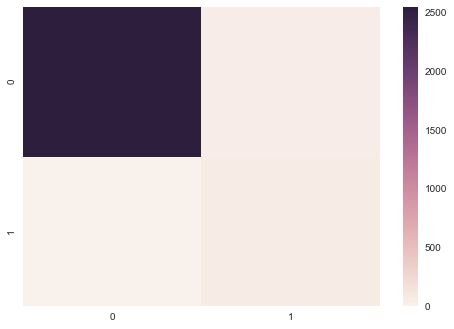

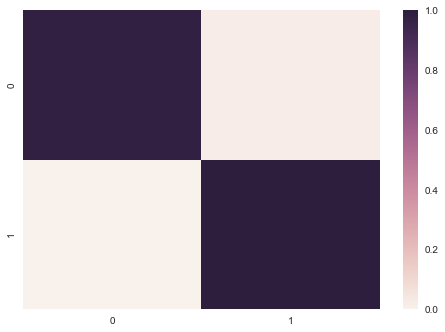

In [28]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
y_pred = predictions
class_names = df.Label

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    ax = sns.heatmap(cm)

# Compute confusion matrix
cnf_matrix = confusion_matrix(predictions,label_test)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [29]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=100)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(messages_tfidf_dense)

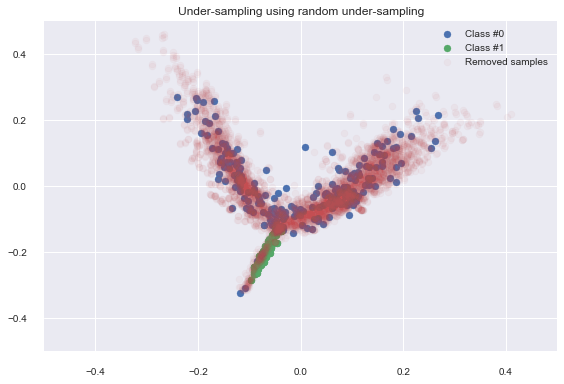

In [43]:
# Apply the random under-sampling
rus = RandomUnderSampler(return_indices=True)
y = df.Label
X_resampled, y_resampled, idx_resampled = rus.fit_sample(messages_tfidf_dense, y)
X_res_vis = pca.transform(X_resampled)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                   idx_resampled)

idx_class_0 = y_resampled == 0
plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
            alpha=1, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
            alpha=1, label='Class #1')
plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1],
            alpha=.05, label='Removed samples')

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

plt.xlim([-0.5, 0.5])
plt.ylim([-0.5, 0.5])
plt.title('Under-sampling using random under-sampling')
plt.legend()
plt.tight_layout()
plt.show()

In [46]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_res_vis, y_resampled)

clf = GaussianNB().fit(X_train_resampled, y_train_resampled)

all_predictions = clf.predict(X_test_resampled)
print classification_report(y_test_resampled, all_predictions)

             precision    recall  f1-score   support

          0       0.98      1.00      0.99        49
          1       1.00      0.98      0.99        55

avg / total       0.99      0.99      0.99       104



5it [00:00, 38.36it/s]


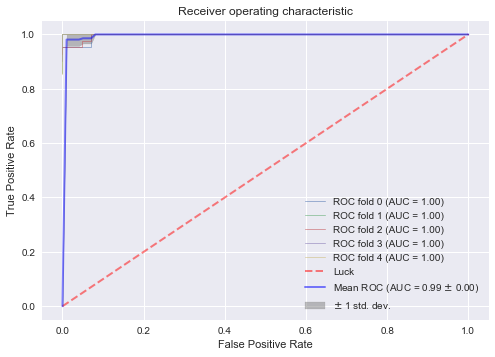

In [48]:
from scipy import interp
from sklearn import svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from tqdm import tqdm
import numpy as np

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=5)
classifier = GaussianNB()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in tqdm(cv.split(X_res_vis, y_resampled)):
    probas_ = classifier.fit(X_res_vis[train], y_resampled[train]).predict_proba(X_res_vis[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_resampled[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.5,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
    
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.5)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.5)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0) 
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.5,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion matrix, without normalization
[[49  1]
 [ 0 54]]
Normalized confusion matrix
[[ 0.98  0.02]
 [ 0.    1.  ]]


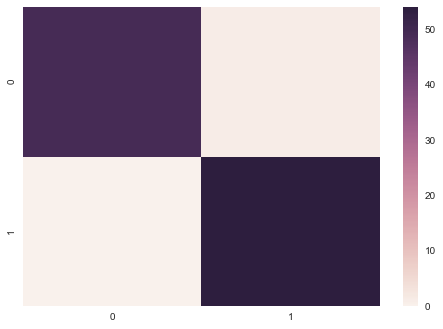

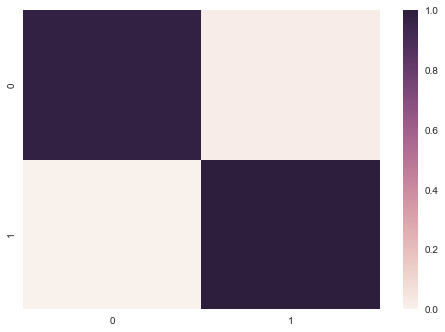

In [50]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
all_predictions = clf.predict(X_test_resampled)
y_pred = all_predictions
class_names = df.Label

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    ax = sns.heatmap(cm)

# Compute confusion matrix
cnf_matrix = confusion_matrix(all_predictions,y_test_resampled)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()